# Forecasting Model_Arima
#Dataset:"spot-prices-for-crude-oil-and-petroleum-products.csv"

#The price of Brent crude from the North Sea.
#WTI the price of the New York Mercantile Exchange (NYMEX)

In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Dataframe

series = pd.read_csv('spot-prices-for-crude-oil-and-petroleum-products.csv', sep=';', header=0,index_col=0, parse_dates=True)
#parse_dates=True then index will be DatatimeIndex

In [24]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9193 entries, 2001-12-31 to 1986-04-08
Data columns (total 2 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Brent Spot Price (U.S. Dollars per Barrel)  8777 non-null   float64
 1   WTI Spot Price (U.S. Dollars per Barrel)    9061 non-null   float64
dtypes: float64(2)
memory usage: 215.5 KB


In [3]:
#Chk Missing values in Data set
print("Missing Values Before Imputation :",pd.isnull(series).sum())
# Fill Missing values using interpolate-liner method
series.interpolate(method='linear', inplace=True)
#Chk Missing values in Data set
print("Missing Values After Interpolate-Linear Method :",pd.isnull(series).sum())

Missing Values Before Imputation : Brent Spot Price (U.S. Dollars per Barrel)    416
WTI Spot Price (U.S. Dollars per Barrel)      132
dtype: int64
Missing Values After Interpolate-Linear Method : Brent Spot Price (U.S. Dollars per Barrel)    0
WTI Spot Price (U.S. Dollars per Barrel)      0
dtype: int64


In [32]:
#Make Time Series in daily 
# make it a time series, resample to a higher freq, apply mean, interpolate and round

series=series.set_index([series.index]).resample('D').mean().interpolate('linear').round(1)
series1=series

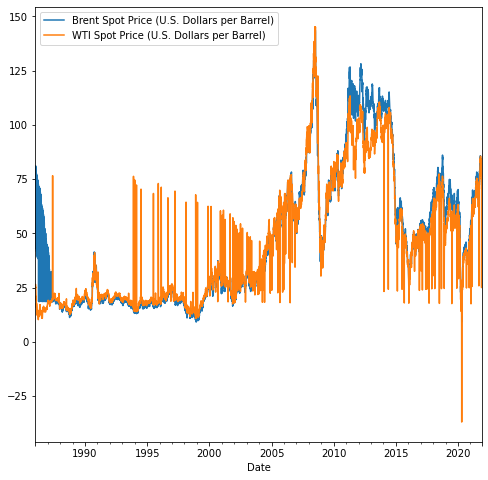

In [5]:
# line plot of time series
from matplotlib import pyplot
# changing the rc parameters and plotting a line plot
plt.rcParams['figure.figsize'] = [8, 8]
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Brent Spot Price (U.S. Dollars per Barrel)'}>,
        <AxesSubplot:title={'center':'WTI Spot Price (U.S. Dollars per Barrel)'}>]],
      dtype=object)

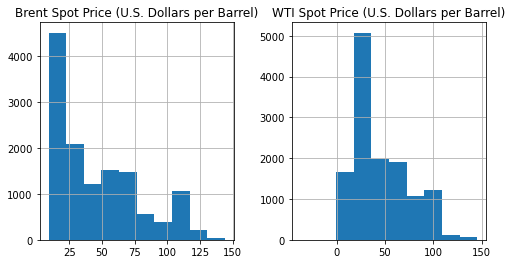

In [51]:
# changing the rc parameters and plotting a Histogram
plt.rcParams['figure.figsize'] = [8, 4]
series.hist()

<AxesSubplot:ylabel='Density'>

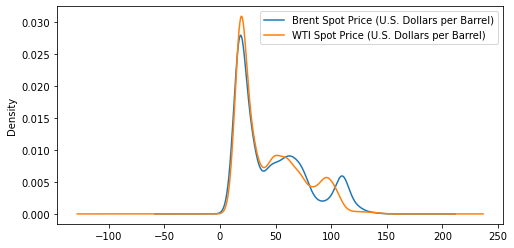

In [8]:
series.plot(kind='kde')

In [33]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 13106, Validation 10


In [26]:
dataset

,Brent Spot Price (U.S. Dollars per Barrel),WTI Spot Price (U.S. Dollars per Barrel)
Date,,
1986-01-02,71.6,25.6
1986-01-03,70.9,26.0
1986-01-04,62.5,26.2
1986-01-05,54.1,26.4
1986-01-06,45.6,26.5
...,...,...
2021-11-15,81.9,80.8
2021-11-16,82.8,80.8
2021-11-17,80.7,78.3


In [27]:
validation

,Brent Spot Price (U.S. Dollars per Barrel),WTI Spot Price (U.S. Dollars per Barrel)
Date,,
2021-11-20,80.5,76.3
2021-11-21,80.7,76.5
2021-11-22,81.0,76.7
2021-11-23,83.4,78.3
2021-11-24,82.4,78.3
2021-11-25,82.0,25.0
2021-11-26,72.4,27.3
2021-11-27,72.7,41.5
2021-11-28,73.0,55.7


#### Persistence/ Base model

In [34]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = series
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [35]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Brent Predicted =%.3f, Expected =%.3f  WTI Predicted =%.3f, Expected =%.3f' % (yhat[0], obs[0],yhat[1], obs[1]))
   
# report performance
rmse_Brent = sqrt(mean_squared_error(test[0], predictions[0]))
rmse_WTI = sqrt(mean_squared_error(test[1], predictions[1]))
print('>RMSE Brent: %.3f' % rmse_Brent)
print('RMSE WTI: %.3f' % rmse_WTI)


>Brent Predicted =30.600, Expected =31.000  WTI Predicted =32.900, Expected =33.400
>Brent Predicted =31.000, Expected =30.800  WTI Predicted =33.400, Expected =33.700
>Brent Predicted =30.800, Expected =31.000  WTI Predicted =33.700, Expected =32.800
>Brent Predicted =31.000, Expected =30.300  WTI Predicted =32.800, Expected =32.400
>Brent Predicted =30.300, Expected =29.500  WTI Predicted =32.400, Expected =32.100
>Brent Predicted =29.500, Expected =28.800  WTI Predicted =32.100, Expected =31.700
>Brent Predicted =28.800, Expected =28.300  WTI Predicted =31.700, Expected =32.000
>Brent Predicted =28.300, Expected =29.400  WTI Predicted =32.000, Expected =33.000
>Brent Predicted =29.400, Expected =29.400  WTI Predicted =33.000, Expected =32.900
>Brent Predicted =29.400, Expected =29.300  WTI Predicted =32.900, Expected =32.800
>Brent Predicted =29.300, Expected =29.300  WTI Predicted =32.800, Expected =32.700
>Brent Predicted =29.300, Expected =29.200  WTI Predicted =32.700, Expected 

>Brent Predicted =88.400, Expected =88.100  WTI Predicted =88.800, Expected =89.100
>Brent Predicted =88.100, Expected =87.800  WTI Predicted =89.100, Expected =89.300
>Brent Predicted =87.800, Expected =90.000  WTI Predicted =89.300, Expected =88.300
>Brent Predicted =90.000, Expected =90.700  WTI Predicted =88.300, Expected =87.400
>Brent Predicted =90.700, Expected =88.500  WTI Predicted =87.400, Expected =90.200
>Brent Predicted =88.500, Expected =88.500  WTI Predicted =90.200, Expected =88.200
>Brent Predicted =88.500, Expected =88.100  WTI Predicted =88.200, Expected =88.100
>Brent Predicted =88.100, Expected =87.700  WTI Predicted =88.100, Expected =87.900
>Brent Predicted =87.700, Expected =87.300  WTI Predicted =87.900, Expected =87.700
>Brent Predicted =87.300, Expected =87.800  WTI Predicted =87.700, Expected =90.100
>Brent Predicted =87.800, Expected =91.700  WTI Predicted =90.100, Expected =94.400
>Brent Predicted =91.700, Expected =92.600  WTI Predicted =94.400, Expected 

>Brent Predicted =75.200, Expected =75.500  WTI Predicted =75.200, Expected =75.000
>Brent Predicted =75.500, Expected =75.800  WTI Predicted =75.000, Expected =74.800
>Brent Predicted =75.800, Expected =76.000  WTI Predicted =74.800, Expected =74.700
>Brent Predicted =76.000, Expected =75.500  WTI Predicted =74.700, Expected =71.900
>Brent Predicted =75.500, Expected =75.500  WTI Predicted =71.900, Expected =74.000
>Brent Predicted =75.500, Expected =74.900  WTI Predicted =74.000, Expected =75.000
>Brent Predicted =74.900, Expected =75.000  WTI Predicted =75.000, Expected =74.500
>Brent Predicted =75.000, Expected =75.200  WTI Predicted =74.500, Expected =74.400
>Brent Predicted =75.200, Expected =75.400  WTI Predicted =74.400, Expected =74.200
>Brent Predicted =75.400, Expected =75.600  WTI Predicted =74.200, Expected =74.100
>Brent Predicted =75.600, Expected =75.800  WTI Predicted =74.100, Expected =74.000
>Brent Predicted =75.800, Expected =77.500  WTI Predicted =74.000, Expected 

>Brent Predicted =109.400, Expected =109.800  WTI Predicted =101.400, Expected =102.000
>Brent Predicted =109.800, Expected =110.100  WTI Predicted =102.000, Expected =102.500
>Brent Predicted =110.100, Expected =110.400  WTI Predicted =102.500, Expected =103.500
>Brent Predicted =110.400, Expected =109.400  WTI Predicted =103.500, Expected =103.200
>Brent Predicted =109.400, Expected =109.000  WTI Predicted =103.200, Expected =102.500
>Brent Predicted =109.000, Expected =109.300  WTI Predicted =102.500, Expected =102.700
>Brent Predicted =109.300, Expected =109.500  WTI Predicted =102.700, Expected =103.000
>Brent Predicted =109.500, Expected =109.800  WTI Predicted =103.000, Expected =103.200
>Brent Predicted =109.800, Expected =109.200  WTI Predicted =103.200, Expected =102.200
>Brent Predicted =109.200, Expected =109.400  WTI Predicted =102.200, Expected =102.900
>Brent Predicted =109.400, Expected =108.500  WTI Predicted =102.900, Expected =102.700
>Brent Predicted =108.500, Expec

>Brent Predicted =47.100, Expected =47.800  WTI Predicted =46.000, Expected =38.800
>Brent Predicted =47.800, Expected =48.400  WTI Predicted =38.800, Expected =31.600
>Brent Predicted =48.400, Expected =49.100  WTI Predicted =31.600, Expected =24.300
>Brent Predicted =49.100, Expected =49.200  WTI Predicted =24.300, Expected =30.800
>Brent Predicted =49.200, Expected =47.600  WTI Predicted =30.800, Expected =45.100
>Brent Predicted =47.600, Expected =48.500  WTI Predicted =45.100, Expected =45.500
>Brent Predicted =48.500, Expected =46.500  WTI Predicted =45.500, Expected =44.200
>Brent Predicted =46.500, Expected =46.500  WTI Predicted =44.200, Expected =44.300
>Brent Predicted =46.500, Expected =46.500  WTI Predicted =44.300, Expected =44.400
>Brent Predicted =46.500, Expected =46.600  WTI Predicted =44.400, Expected =44.400
>Brent Predicted =46.600, Expected =46.700  WTI Predicted =44.400, Expected =45.100
>Brent Predicted =46.700, Expected =46.700  WTI Predicted =45.100, Expected 

>Brent Predicted =70.600, Expected =70.100  WTI Predicted =67.700, Expected =67.100
>Brent Predicted =70.100, Expected =69.600  WTI Predicted =67.100, Expected =66.600
>Brent Predicted =69.600, Expected =71.100  WTI Predicted =66.600, Expected =68.300
>Brent Predicted =71.100, Expected =72.000  WTI Predicted =68.300, Expected =69.300
>Brent Predicted =72.000, Expected =71.800  WTI Predicted =69.300, Expected =69.100
>Brent Predicted =71.800, Expected =70.900  WTI Predicted =69.100, Expected =68.400
>Brent Predicted =70.900, Expected =70.600  WTI Predicted =68.400, Expected =68.100
>Brent Predicted =70.600, Expected =70.300  WTI Predicted =68.100, Expected =67.700
>Brent Predicted =70.300, Expected =70.100  WTI Predicted =67.700, Expected =67.400
>Brent Predicted =70.100, Expected =69.400  WTI Predicted =67.400, Expected =66.500
>Brent Predicted =69.400, Expected =68.600  WTI Predicted =66.500, Expected =65.400
>Brent Predicted =68.600, Expected =66.800  WTI Predicted =65.400, Expected 

#### ARIMA Hyperparameters

In [25]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.values
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list() 
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        print("\nHistory: ",history)
        print("Predicatin: ", predictions)
        #print('\nBrent Predicted =%.3f, Expected =%.3f ' % (test[0], predictions[0]))
 # calculate out of sample error
    #rmse = sqrt(mean_squared_error(test, predictions))
    rmse_Brent = sqrt(mean_squared_error(test[0], predictions[0]))
    print("hi")
    print(rmse_Brent)
    return rmse_Brent




In [30]:
history[0]

array([71.6, 25.6], dtype=float32)

#### Grid search for p,d,q values

In [14]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    #Brent
                    
                    rmse_Brent = evaluate_arima_model(train, order)
                    if rmse_Brent < best_score:
                        best_score, best_cfg = rmse_Brent, order
                    print('< Brent ARIMA%s RMSE=%.3f' % (order,rmse_Brent))
                    #WIT
                    #rmse_WTI = evaluate_arima_model(data2, order)
                    #if rmse < best_score:
                        #best_score1, best_cfg1 = rmse_WTI, order
                    #print('< WTI ARIMA%s RMSE=%.3f' % (order,rmse_WTI))
                except:
                    continue
    print('Brent- Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    #print('WIT- Best ARIMA%s RMSE=%.3f' % (best_cfg1, best_score1))

In [26]:
# load dataset
#train = read_csv('spot-prices-for-crude-oil-and-petroleum-products.csv', sep=';',header=0, index_col=0, parse_dates=True)
train=series
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
data1=series.iloc[:, 0]
data2=series.iloc[:, 1]
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Brent- Best ARIMANone RMSE=inf


#### Build Model based on the optimized values

In [121]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [110]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [111]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

ValueError: endog is required to have ndim 1 but has ndim 2

In [ ]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

#### Combine train and test data and build final model

In [ ]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

In [ ]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [ ]:
forecast